Enter arrival data and queue value for North Lane
10 6
a
b
North density value:  5.203225806451613
Enter arrival data and queue value for South Lane

C:\Users\Admin\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()



6 3


C:\Users\Admin\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


South density value:  4.022407407407407
Enter arrival data and queue value for East Lane
1 1


C:\Users\Admin\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


East density value:  5.0
Enter arrival data and queue value for Lane Lane
7 5
West density value:  5.0
New Values are
North-South Lane 25
East_west_Lane 44


C:\Users\Admin\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


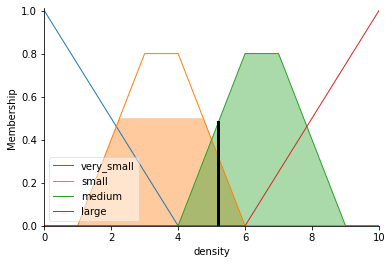

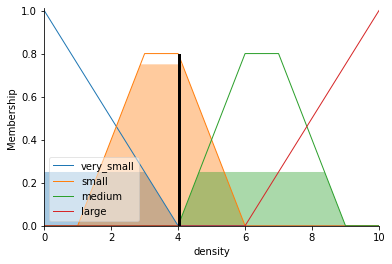

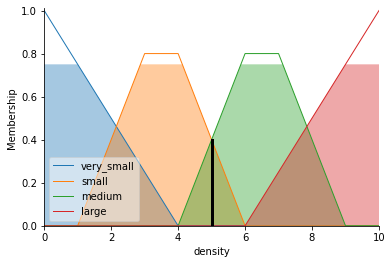

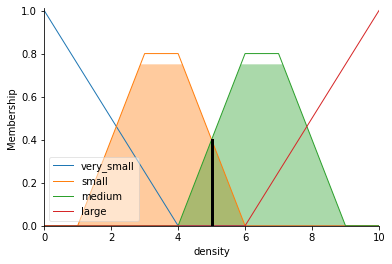

In [4]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz
import math
arrival=ctrl.Antecedent(np.arange(0,11,1),'arrival')
queue=ctrl.Antecedent(np.arange(0,11,1),'queue')
density=ctrl.Consequent(np.arange(0,11,1),'density')
#----------
arrival['almost']=fuzz.trimf(arrival.universe,[0,0,4])
arrival['few']=fuzz.trimf(arrival.universe,[0,4,8])
arrival['many']=fuzz.trimf(arrival.universe,[2,6,10])
arrival['too_many']=fuzz.trimf(arrival.universe,[6,10,10])
#---------
queue['very_small']=fuzz.trimf(queue.universe,[0,0,4])
queue['small']=fuzz.trimf(queue.universe,[0,4,8])
queue['medium']=fuzz.trimf(queue.universe,[2,6,10])
queue['large']=fuzz.trimf(queue.universe,[6,10,10])
#---------
density['very_small']=fuzz.trimf(density.universe,[0,0,4])
density['small']=fuzz.trimf(density.universe,[1,3.5,6])
density['medium']=fuzz.trimf(density.universe,[4,6.5,9])
density['large']=fuzz.trimf(density.universe,[6,10,10])


#----------------




density_rule1=ctrl.Rule(arrival['almost'] | queue['very_small'],density['very_small'])
density_rule2=ctrl.Rule(arrival['almost'] | queue['small'],density['small'])
density_rule3=ctrl.Rule(arrival['almost'] | queue['medium'],density['medium'])
density_rule4=ctrl.Rule(arrival['almost'] | queue['large'],density['large'])

density_rule5=ctrl.Rule(arrival['few'] | queue['very_small'],density['very_small'])
density_rule6=ctrl.Rule(arrival['few'] | queue['small'],density['very_small'])
density_rule7=ctrl.Rule(arrival['few'] | queue['medium'],density['small'])
density_rule8=ctrl.Rule(arrival['few'] | queue['large'],density['large'])

density_rule9=ctrl.Rule(arrival['many'] | queue['very_small'],density['very_small'])
density_rule10=ctrl.Rule(arrival['many'] | queue['small'],density['small'])
density_rule11=ctrl.Rule(arrival['many'] | queue['medium'],density['medium'])
density_rule12=ctrl.Rule(arrival['many'] | queue['large'],density['large'])

density_rule13=ctrl.Rule(arrival['too_many'] | queue['very_small'],density['small'])
density_rule14=ctrl.Rule(arrival['too_many'] | queue['small'],density['small'])
density_rule15=ctrl.Rule(arrival['too_many'] | queue['medium'],density['medium'])
density_rule16=ctrl.Rule(arrival['too_many'] | queue['large'],density['large'])
density_system=ctrl.ControlSystem([density_rule1,density_rule2,density_rule3,density_rule4])
density_system=ctrl.ControlSystemSimulation(density_system)

dense_val1=ctrl.Antecedent(np.arange(0,11,1),'dense_val1')
dense_val1['very_small']=fuzz.trimf(dense_val1.universe,[0,0,4])
dense_val1['small']=fuzz.trimf(dense_val1.universe,[1,3.5,6])
dense_val1['medium']=fuzz.trimf(dense_val1.universe,[4,6.5,9])
dense_val1['large']=fuzz.trimf(dense_val1.universe,[6,10,10])
dense_val2=ctrl.Antecedent(np.arange(0,11,1),'dense_val2')
dense_val2['very_small']=fuzz.trimf(dense_val2.universe,[0,0,4])
dense_val2['small']=fuzz.trimf(dense_val2.universe,[1,3.5,6])
dense_val2['medium']=fuzz.trimf(dense_val2.universe,[4,6.5,9])
dense_val2['large']=fuzz.trimf(dense_val2.universe,[6,10,10])



extension=ctrl.Consequent(np.arange(0,41,1),'extension')
extension['zero']=fuzz.trimf(extension.universe,[0,0,10])
extension['short']=fuzz.trimf(extension.universe,[0,10,20])
extension['medium']=fuzz.trimf(extension.universe,[20,30,40])
extension['larger']=fuzz.trimf(extension.universe,[30,40,40])

extRule1=ctrl.Rule(dense_val1['very_small'] | dense_val2['very_small'],extension['zero'])
extRule2=ctrl.Rule(dense_val1['very_small'] | dense_val2['small'],extension['short'])
extRule3=ctrl.Rule(dense_val1['very_small'] | dense_val2['medium'],extension['medium'])
extRule4=ctrl.Rule(dense_val1['very_small'] | dense_val2['large'],extension['larger'])

extRule5=ctrl.Rule(dense_val1['small'] | dense_val2['very_small'],extension['zero'])
extRule6=ctrl.Rule(dense_val1['small'] | dense_val2['small'],extension['zero'])
extRule7=ctrl.Rule(dense_val1['small'] | dense_val2['medium'],extension['short'])
extRule8=ctrl.Rule(dense_val1['small'] | dense_val2['large'],extension['larger'])

extRule9=ctrl.Rule(dense_val1['medium'] | dense_val2['very_small'],extension['short'])
extRule10=ctrl.Rule(dense_val1['medium'] | dense_val2['small'],extension['medium'])
extRule11=ctrl.Rule(dense_val1['medium'] | dense_val2['medium'],extension['short'])
extRule12=ctrl.Rule(dense_val1['medium'] | dense_val2['large'],extension['larger'])

extRule13=ctrl.Rule(dense_val1['large'] | dense_val2['very_small'],extension['larger'])
extRule14=ctrl.Rule(dense_val1['large'] | dense_val2['small'],extension['medium'])
extRule15=ctrl.Rule(dense_val1['large'] | dense_val2['medium'],extension['short'])
extRule16=ctrl.Rule(dense_val1['large'] | dense_val2['large'],extension['zero'])

extension_system=ctrl.ControlSystem([extRule1,extRule2,extRule3,extRule4,extRule5,extRule6,extRule7,extRule8,extRule9,extRule10,extRule11,extRule12,extRule13,extRule14,extRule15,extRule16])
extension_system=ctrl.ControlSystemSimulation(extension_system)
while(True):
    ns=25
    ew=25
    print("Enter arrival data and queue value for North Lane")
    n=list(map(int,input().split()))
    density_system.input['arrival']=n[0]
    density_system.input['queue']=n[1]
    print('a')
    density_system.compute()
    print('b')
    north_val=density_system.output['density']
    print("North density value: ",north_val)
    density.view(sim=density_system)
    print("Enter arrival data and queue value for South Lane")
    s = list(map(int, input().split()))
    density_system.input['arrival'] = s[0]
    density_system.input['queue'] = s[1]
    density_system.compute()
    south_val = density_system.output['density']
    print("South density value: ", south_val)
    density.view(sim=density_system)
    ns_sum=(north_val+south_val)//2
    print("Enter arrival data and queue value for East Lane")
    e = list(map(int, input().split()))
    density_system.input['arrival'] = e[0]
    density_system.input['queue'] = e[1]
    density_system.compute()
    east_val = density_system.output['density']
    print("East density value: ", east_val)
    density.view(sim=density_system)
    print("Enter arrival data and queue value for West Lane")
    w = list(map(int, input().split()))
    density_system.input['arrival'] = w[0]
    density_system.input['queue'] = w[1]
    density_system.compute()
    west_val = density_system.output['density']
    print("West density value: ", west_val)
    density.view(sim=density_system)
    ew_sum=(east_val+west_val)//2
    extension_system.input['dense_val1']=ns_sum
    extension_system.input['dense_val2']=ew_sum
    extension_system.compute()
    extend_val=extension_system.output['extension']
    extend_val=math.ceil(extend_val)
    if(ns_sum>ew_sum):
        ns+=extend_val
        if(ns>50):
            ns=50
    else:
        ew+=extend_val
        if(ew>50):
            ew=50
    print("New Values are")
    print("North-South Lane",ns)
    print("East_west_Lane",ew)
    break